In [1]:
import sys
import os
import json
from visualization import *
sys.path.append('Markov/')
from markovchain import *

In [5]:
data_path="Data/dataset24.json"

In [6]:
with open(data_path, "r") as f:
    training_data=json.load(f)
print(len(training_data))

412


In [7]:
states=extract_states(training_data)
model=MarkovChainMelodyGenerator(states)
model.train(training_data)
model_end=MarkovChainMelodyGenerator(states)
model_end.train(training_data,end_transition=True)

In [19]:
generated_melody = model.generate(30,mode="measure")
print(generated_melody)

178
['A4-0.5', 'A4-1.0', 'rest-0.25', 'A4-0.25', 'C5-0.25', 'B-4-1.0', 'E4-0.25', 'D4-0.25', 'D#4-0.25', 'E4-0.25', 'G4-0.25', 'C5-0.25', 'C5-0.25', 'B4-0.25', 'C5-0.25', 'D-5-0.25', 'C5-0.25', 'A4-0.25', 'C#5-0.25', 'C#5-1.0', 'B-5-0.5', 'E5-0.25', 'D5-0.25', 'D-5-0.25', 'C5-0.25', 'A4-0.25', 'C5-0.25', 'C5-1.0', 'D5-0.25', 'C5-0.25', 'D5-0.5', 'E5-0.25', 'F5-0.25', 'F5-1.0', 'F5-0.25', 'A-5-0.25', 'G5-0.25', 'F#5-0.25', 'F#5-0.25', 'G5-0.25', 'G5-0.5', 'F5-0.5', 'E5-0.25', 'G5-0.25', 'B5-0.25', 'E6-0.25', 'E5-0.25', 'G5-0.25', 'F5-0.25', 'F5-0.25', 'F5-0.25', 'A4-0.25', 'E4-0.25', 'G4-0.25', 'E4-0.25', 'F4-0.25', 'G4-0.25', 'rest-0.5', 'rest-0.25', 'B#4-0.25', 'C#5-0.25', 'E5-0.25', 'F5-0.25', 'F5-0.5', 'E5-0.25', 'D5-0.25', 'rest-0.25', 'B-4-0.25', 'D5-0.5', 'C5-0.25', 'B-4-0.25', 'B-4-0.5', 'F5-0.5', 'F#5-0.25', 'F#5-0.25', 'D5-0.25', 'F5-0.25', 'G5-0.25', 'A5-0.25', 'A4-0.25', 'C5-0.25', 'B4-0.25', 'C5-0.5', 'A5-0.25', 'B5-0.25', 'A#5-0.5', 'C#6-0.25', 'B5-0.25', 'D6-0.5', 'B5-0.2

In [9]:
generated_melody_end = model_end.generate(50,mode="note")
print(generated_melody_end)
print(len(generated_melody_end))

['F4-1.0', 'E4-0.25', 'G4-0.25', 'F5-0.25', 'E5-0.25', 'D5-0.25', 'D5-0.25', 'D5-0.25', 'C5-0.25', 'F5-0.25', 'F5-0.25', 'G5-0.25', 'D#5-0.25', 'C#6-0.25', 'B5-0.25', 'B5-0.25', 'A5-0.5', 'A#5-0.25', 'B5-0.25', 'B5-0.25', 'D6-0.5', 'C6-0.25', 'B-5-0.25', 'D-6-0.25', 'C6-0.25', 'G5-0.25', 'A5-0.25', 'rest-0.25', 'A4-0.25', 'D5-0.25', 'rest-0.25', 'A4-0.25', 'E4-0.25', 'B4-0.5', 'A4-0.25', 'G4-0.25', 'G#4-0.5', 'B-4-0.5', 'D4-0.25', 'C#4-0.25', 'D4-0.25', 'E4-0.25', 'G4-0.25', 'A4-0.25', 'F#4-0.25']
45


In [12]:
generated_melody2 = model.generate(20,starting_sequence=["A5-1.25", "C5-0.25", "D5-0.25"])
print(generated_melody2)

['A5-1.25', 'C5-0.25', 'D5-0.25', 'C#5-0.25', 'A4-0.25', 'C5-0.25', 'B-4-0.25', 'G4-0.25', 'F#4-0.5', 'D4-0.5', 'C#4-0.25', 'A#3-0.25', 'C#4-0.25', 'B-3-0.25', 'G4-0.5', 'D4-0.25', 'F4-0.25', 'E4-0.25', 'rest-0.25', 'C4-0.25']


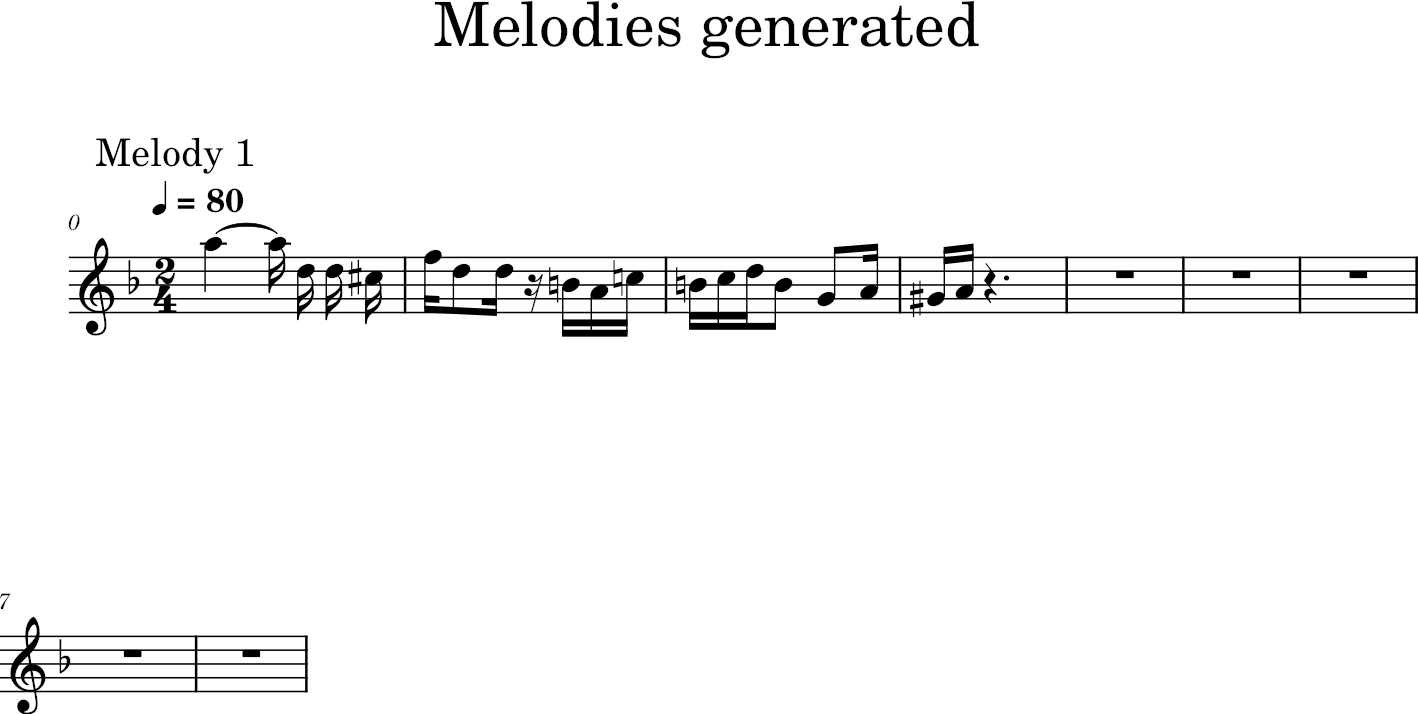

In [9]:
visualize("2/4",["F"],[generated_melody2]).show()

In [11]:
#Folk (Windows)
music21.environment.set('musescoreDirectPNGPath',str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
music21.environment.set('musicxmlPath', str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
visualize("2/4",["E"],[generated_melody]).show("musicxml")

In [13]:
title="Markov_1end"
key="F"
generated_melodies=[model_end.generate(16,mode="measure") for _ in range(40)]
generated_to_json(title,generated_melodies,key=key)

In [ ]:
lenlist=[]
maxlen=0
imax=0
minlen=len(training_data[0])
imin=0
for i in range(len(training_data)):
    melody=training_data[i]
    lenlist.append(len(melody))
    if maxlen<len(melody):
        maxlen=len(melody)
        imax=i
    if minlen>len(melody):
        minlen=len(melody)
        imin=i
print(max(lenlist))
print(imax)
print(min(lenlist))
print(imin)

In [23]:
for i in range(len(model.transition_matrix)):
    print(sum(model.transition_matrix[i]))

1.0000000000000002
1.0
1.0
0.9999999999999999
0.9999999999999998
1.0
1.0
1.0
0.9999999999999998
0.9999999999999998
1.0
1.0
1.0
1.0
0.9999999999999996
0.9999999999999998
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999994
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999998
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
1.0
0.9999999999999998
0.9999999999999997
1.0
1.0
0.9999999999999997
1.0000000000000002
1.0
1.0
1.0
1.0000000000000002
1.0
1.0000000000000004
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999997
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999998
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999999
1.0
0.9999999999999998
1.0000000000000002
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
0.999999999